# Real Estate Price Prediction

## The course "Python Libraries for Data Science: Numpy, Mathplotlib, Scikit-Learn" project. 

In [71]:
import numpy as np
import pandas as pd
import random

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [72]:
import warnings
warnings.filterwarnings('ignore')

In [73]:
matplotlib.rcParams.update({'font.size': 14})

# Importing Datasets

In [74]:
TRAIN_DATASET_PATH = 'train.csv'
TEST_DATASET_PATH = 'test.csv'

In [75]:
train_df = pd.read_csv(TRAIN_DATASET_PATH)
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962


In [76]:
print('Train strings:', train_df.shape[0])

Train strings: 10000


In [77]:
test_df = pd.read_csv(TEST_DATASET_PATH)
test_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,4567,44,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,B,B,24,4378,0,1036.0,1,1,B
1,5925,62,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A
2,960,27,2.0,59.463678,NaN,9.0,19,19.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B
3,3848,23,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,B,B,2,475,0,NaN,0,0,B
4,746,74,1.0,53.837056,NaN,1.0,8,17.0,1977,0.309479,B,B,35,7715,4,990.0,0,6,B


In [78]:
print('Test strings:', test_df.shape[0])

Test strings: 5000


In [79]:
train_df.shape[1] - 1 == test_df.shape[1]

True

# Basic Insights from the Data

In [80]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [81]:
train_df['Id'] = train_df['Id'].astype(str)
train_df['DistrictId'] = train_df['DistrictId'].astype(str)

In [82]:
train_df['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

In [83]:
train_df.describe(include="all")

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
count,10000,10000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000,10000.000000
unique,10000,205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
top,11809,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,B,NaN,NaN,NaN,NaN,NaN,NaN,B,NaN
freq,1,851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9903,9725,NaN,NaN,NaN,NaN,NaN,NaN,9175,NaN
mean,NaN,NaN,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,NaN,NaN,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,NaN,214138.857399
std,NaN,NaN,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,NaN,NaN,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,NaN,92872.293865
min,NaN,NaN,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,NaN,NaN,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,NaN,59174.778028
25%,NaN,NaN,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,NaN,NaN,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,NaN,153872.633942
50%,NaN,NaN,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,NaN,NaN,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,NaN,192269.644879
75%,NaN,NaN,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,NaN,NaN,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,NaN,249135.462171


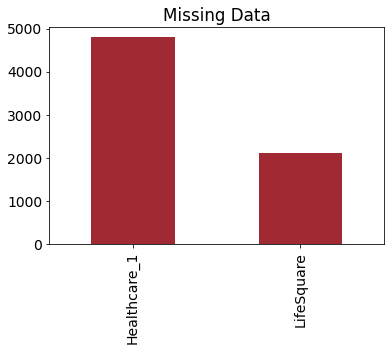

In [84]:
#checking missing values
missing = train_df.isnull().sum()
missing = missing[missing > 0]
missing = missing.sort_values(ascending = False)
missing.plot.bar(color="#a02933")
plt.title('Missing Data');

In [85]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     3959 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   2623 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

In [86]:
test_df['Id'] = test_df['Id'].astype(str)
test_df['DistrictId'] = test_df['DistrictId'].astype(str)

In [87]:
test_df['Rooms'].value_counts()

2.0     2030
1.0     1769
3.0     1099
4.0       90
5.0        7
6.0        2
0.0        2
17.0       1
Name: Rooms, dtype: int64

In [88]:
test_df.describe(include="all")

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
count,5000,5000,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000,5000,5000.000000,5000.000000,5000.000000,2623.000000,5000.00000,5000.000000,5000
unique,5000,201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,2
top,4567,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,B,NaN,NaN,NaN,NaN,NaN,NaN,B
freq,1,391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4952,4851,NaN,NaN,NaN,NaN,NaN,NaN,4588
mean,NaN,NaN,1.910000,56.449500,36.158810,5.976800,8.632000,12.601000,1984.392600,0.119874,NaN,NaN,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800,NaN
std,NaN,NaN,0.838594,19.092787,17.825287,9.950018,5.483228,6.789213,18.573149,0.120070,NaN,NaN,17.532202,4026.614773,23.863762,1044.744231,1.47994,4.777365,NaN
min,NaN,NaN,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,NaN,NaN,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000,NaN
25%,NaN,NaN,1.000000,41.906231,23.092026,1.000000,4.000000,9.000000,1973.000000,0.019509,NaN,NaN,6.000000,1564.000000,0.000000,325.000000,0.00000,1.000000,NaN
50%,NaN,NaN,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,NaN,NaN,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000,NaN
75%,NaN,NaN,2.000000,66.285129,45.174091,9.000000,12.000000,17.000000,2000.000000,0.195781,NaN,NaN,36.000000,7287.000000,5.000000,1548.000000,2.00000,6.000000,NaN


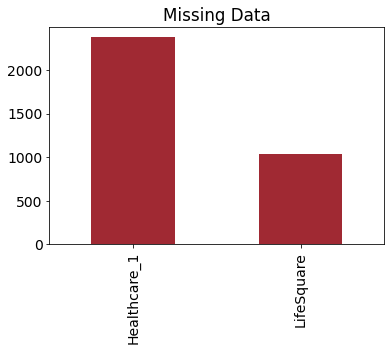

In [89]:
#checking missing values
missing = test_df.isnull().sum()
missing = missing[missing > 0]
missing = missing.sort_values(ascending = False)
missing.plot.bar(color="#a02933")
plt.title('Missing Data');

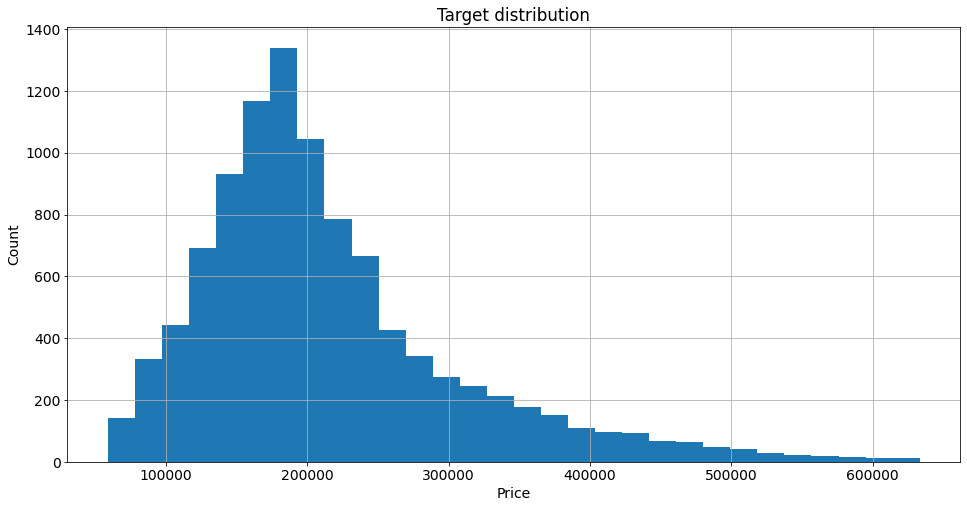

In [90]:
plt.figure(figsize = (16, 8))

train_df['Price'].hist(bins=30)
plt.ylabel('Count')
plt.xlabel('Price')

plt.title('Target distribution')
plt.show()

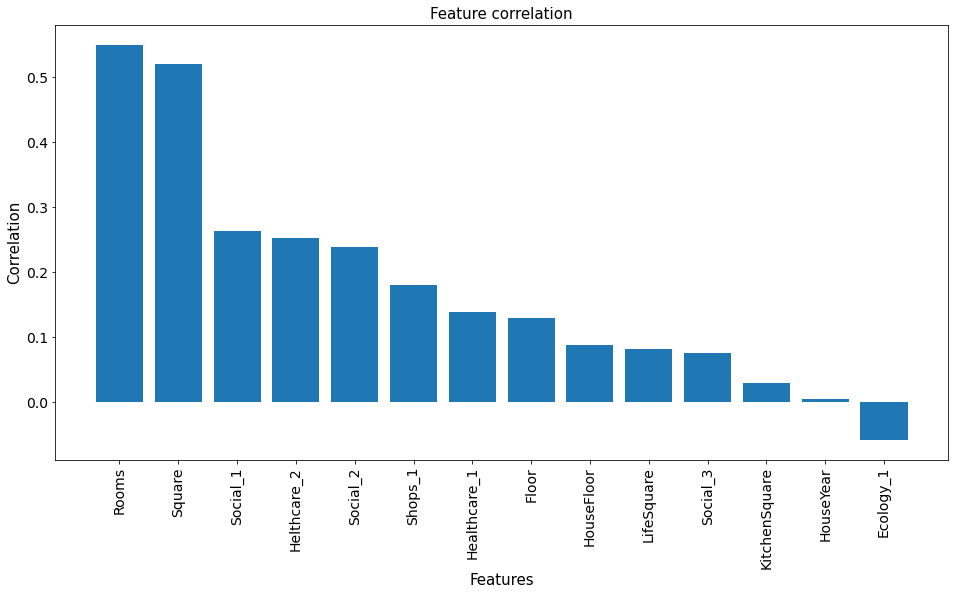

In [91]:
correlation = train_df.corrwith(train_df['Price']).sort_values(ascending=False)
correlation.drop('Price', inplace=True)

plt.figure(figsize = (16, 8))
plt.bar(correlation.index, correlation)
plt.xticks(rotation='90')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Correlation', fontsize=15)
plt.title('Feature correlation', fontsize=15)
plt.show()

# Class for Pre-processing Data

In [92]:
class DataPreprocessor:
    def __init__(self):
        self.medians = None
        self.kitchen_square_max_value = None
        self.kitchen_square_min_value = None
        self.life_square_min_value = None
        self.max_floor = None
        
        
    def fit(self,df):
        # Medians and quantiles
        self.medians = df.median() # medians
        self.kitchen_square_max_value = np.quantile(df['KitchenSquare'], q=0.999) 
        self.kitchen_square_min_value = np.quantile(df['KitchenSquare'], q=0.001) 
        self.life_square_min_value = np.quantile(df['LifeSquare'], q=0.03) 
        self.max_floor = df['Floor'].max()
        
        
    def transform(self,df):
        # Life Square fillna (LifeSquare includes KitchenSquare, approx. 30% other square) 
        df['LifeSquare'].fillna((df['Square'] - df['Square']*0.2), inplace=True)
        
        # Compute median room square and fill outliers with LifeSquare/Room_square 
        condition_rooms = (df['Rooms'] > 6) | (df['Rooms'] == 0)   
        room_sq = np.round((self.medians.LifeSquare / self.medians.Rooms, 1))[0]
        df.loc[condition_rooms , 'Rooms'] = df.loc[condition_rooms, 'LifeSquare'] / room_sq
        
        # Square
        # If LifeSquare > Square: exchange values
        df['Square'], df['LifeSquare'] = np.where(df['Square'] < df['LifeSquare'],(df['LifeSquare'],df['Square']), (df['Square'],df['LifeSquare']))
        
        # LifeSquare
        # Fill outliers with (Square * 0.7 other square)
        ls_condition = (df['LifeSquare'] < self.life_square_min_value)
        df.loc[ls_condition, 'LifeSquare'] = df.loc[ls_condition, ['Square']] * 0.7
        
        # KitchenSquare
        # Fill outliers with (10% of Square)
        condition_kitchen_square = (df['KitchenSquare'] > self.kitchen_square_max_value) | (df['KitchenSquare'] < self.kitchen_square_min_value)
        df.loc[condition_kitchen_square, 'KitchenSquare'] = df.loc[condition_kitchen_square, 'Square'] * 0.1 
         
        # HouseFloor
        # If HouseFloor < Floor: exchange values
        house_floor_condition = df['HouseFloor'] < df['Floor']
        df.loc[house_floor_condition, 'HouseFloor'] = df.loc[house_floor_condition, 'Floor']
        
        # HouseYear
        # If HouseYear > current year set median value
        current_year = datetime.now().year
        condition_year = (df['HouseYear'] > current_year)
        df.loc[condition_year, 'HouseYear'] = self.medians.HouseYear
        
        # Ecology2,Ecology3 and Shops2
        # Switch to binary
        df.replace({'Ecology_2': {'A': 0, 'B': 1}}, inplace=True)
        df.replace({'Ecology_3': {'A': 0, 'B': 1}}, inplace=True)
        df.replace({'Shops_2': {'A': 0, 'B': 1}}, inplace=True)
        
        # Fillna just in case
        df.fillna(self.medians, inplace=True)
        
        return df

# Class for Features generating

In [93]:
class FeatureGenerator:
    def __init__(self):
        self.district_price_per_square = None
        self.min_sq = None
        self.max_sq = None

        
    def fit(self, df):   
        self.min_sq = np.quantile(df['Square'], q=0.005)
        self.max_sq = np.quantile(df['Square'], q=0.995)
        
        self.district_price_per_square = df.groupby(['DistrictId'])['Price'].agg('median') \
        / df.groupby(['DistrictId'])['Square'].agg('median')  # median price for square meter in each district
        
    
    def new_features(self, df):
        
        # Median price for square meter in each district
        self.district_price_per_square.to_dict()
        df['DistrictPrice'] = df['DistrictId'].map(self.district_price_per_square)
        
        self.median_district_price_per_square = df['DistrictPrice'].median()
        df['DistrictPrice'].fillna(self.median_district_price_per_square, inplace=True)
        
        # Scale and merge Social
        scaler1 = RobustScaler()
        pca = PCA(n_components=1, random_state=42)
        social_scaled = pd.DataFrame(scaler1.fit_transform(df[['Social_1', 'Social_2', 'Social_3']]))
        df['Social'] = pca.fit_transform(social_scaled)
        
        # Scale and merge Healthcare
        scaler2 = RobustScaler()
        pca = PCA(n_components=1, random_state=42)
        healthcare_scaled = pd.DataFrame(scaler2.fit_transform(df[['Healthcare_1', 'Helthcare_2']]))
        df['Healthcare'] = pca.fit_transform(healthcare_scaled)
        
        return df

### Pre-processing Data

In [94]:
preprocessor = DataPreprocessor()
preprocessor.fit(train_df)

train_df = preprocessor.transform(train_df)
test_df = preprocessor.transform(test_df)

In [95]:
features_gen = FeatureGenerator()
features_gen.fit(train_df)

train_df = features_gen.new_features(train_df)
test_df = features_gen.new_features(test_df)

In [96]:
y = pd.DataFrame(data=train_df['Price'])
train_df.drop('Price', axis=1, inplace=True)

X_train, X_valid, y_train, y_valid = train_test_split(train_df, y, test_size=0.20, random_state=42)

In [97]:
X_train.shape, X_valid.shape, test_df.shape

((8000, 22), (2000, 22), (5000, 22))

In [98]:
X_train.isna().sum().sum(), X_valid.isna().sum().sum(), test_df.isna().sum().sum()

(0, 0, 0)

## Prediction

In [99]:
def evaluate_preds(true_values, pred_values, save=False):
    
    print("R2:\t" + str(round(r2(true_values, pred_values), 3)))

In [100]:
rf_model = RandomForestRegressor(random_state=24)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=24)

In [101]:
y_train_preds = rf_model.predict(X_train)
evaluate_preds(y_train, y_train_preds)

R2:	0.964


In [102]:
y_valid_preds = rf_model.predict(X_valid)
evaluate_preds(y_valid, y_valid_preds)

R2:	0.767


In [103]:
test_df.shape

(5000, 22)

In [104]:
submit = pd.read_csv('sample_submission.csv')
submit.head()

,Id,Price
0,4567,200000.0
1,5925,200000.0
2,960,200000.0
3,3848,200000.0
4,746,200000.0


In [105]:
y_test_preds = rf_model.predict(test_df)
y_test_preds

array([154901.7909261 , 119759.74285994, 146663.41209453, ...,
       142797.20577107, 187673.56402669, 281487.59402403])

In [106]:
submit['Price'] = y_test_preds
submit.head()

,Id,Price
0,4567,154901.790926
1,5925,119759.742860
2,960,146663.412095
3,3848,113963.868600
4,746,171774.174129


In [107]:
submit.to_csv('sample_submission.csv', index=False)